In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from ast import literal_eval

sns.set_style('white')

In [2]:
# lendo os dados
reli = pd.read_csv('../../datasets/stratified/reli.csv')

# mudando o formato das colunas
for col in ('tokens', 'aspect_tags'):
    reli[col] = reli[col].apply(literal_eval)

In [3]:
# comprimento das reviews
reli['lengths'] = reli.tokens.map(len)

In [4]:
# agrupando por review
reli_reviews = reli.groupby(['review']).agg({
    'total_aspects': 'sum',
    'lengths': 'sum',
}).reset_index()
reli_reviews['has_aspect'] = (reli_reviews.total_aspects > 0) * 1

In [5]:
# reviews com mais do que um token
reviews = reli_reviews[reli_reviews.lengths > 1].review
reviews.shape

(1598,)

[]

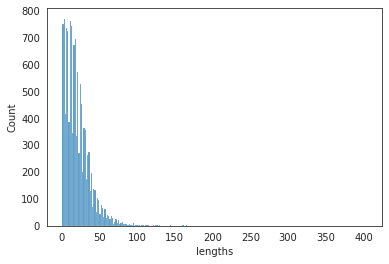

In [6]:
# distribuicão dos comprimentos das sentencas
sns.histplot(reli[reli.review.isin(reviews)]['lengths'])
plt.plot()

[]

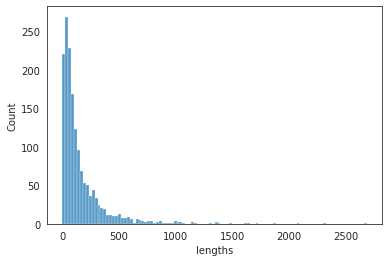

In [7]:
# distribuicão dos comprimentos das reviews
sns.histplot(reli_reviews[reli_reviews.review.isin(reviews)]['lengths'])
plt.plot()

In [8]:
# estatísticas a nível de sentencas
reli[reli.review.isin(reviews)].describe().drop(columns=['fold'])

,review,total_aspects,has_aspect,lengths
count,12429.000000,12429.000000,12429.000000,12429.000000
mean,763.707619,0.222705,0.179580,20.955025
std,449.908885,0.532614,0.383853,18.277212
min,1.000000,0.000000,0.000000,1.000000
25%,358.000000,0.000000,0.000000,9.000000
50%,722.000000,0.000000,0.000000,17.000000
75%,1138.000000,0.000000,0.000000,28.000000
max,1601.000000,5.000000,1.000000,404.000000


In [9]:
# quantidade de sentencas maior do que 100 e maior do que 200 tokens
reli[reli.lengths > 100].shape[0], reli[reli.lengths > 200].shape[0]

(58, 5)

- São 12.429 sentencas (linha: `count`).
- 1.601 reviews (linha: `max` e coluna: `review`).
- Apenas 18% das sentencas possuem aspectos (linha `mean` e coluna: `has_aspect`).
- Em média, as sentencas possui aproximadamente 21 aspectos (linha: `mean` e coluna: `lengths`).
- 75% das sentencas possuem até 28 tokens (linha: `75%` e coluna: `lengths`).
- A sentenca com maior comprimento, possui 404 (linha: `max` e coluna: `lengths`).
- 58 sentencas possui mais do que 100 tokens e 5 possui mais do que 200.

In [10]:
# estatísticas a nível de review
reli_reviews[reli_reviews.review.isin(reviews)].describe()

,review,total_aspects,lengths,has_aspect
count,1598.000000,1598.000000,1598.000000,1598.000000
mean,801.304130,1.732165,162.984981,0.717772
std,462.522907,1.882817,222.514584,0.450225
min,1.000000,0.000000,2.000000,0.000000
25%,401.250000,0.000000,44.000000,0.000000
50%,800.500000,1.000000,91.000000,1.000000
75%,1201.750000,3.000000,194.750000,1.000000
max,1601.000000,13.000000,2683.000000,1.000000


- Em média, as reviews possuem 1.73 aspectos (linha: `mean` e coluna: `total_aspects`).
- 71.72% das reviews possuem aspectos (linha: `mean` e coluna: `has_aspect`).
- Em média, cada review possui 163 tokens (linha: `mean` e coluna: `lengths`).

In [11]:
# reviews com mais do que 100, 200 e 1000 tokens
for i in (100, 200, 1000):
    print(reli_reviews[reli_reviews.lengths > i].shape[0])

(743, 381, 20)

In [12]:
# total de reviews por particão e total de aspectos por particão
summary = (
    reli[reli.review.isin(reviews)]
    .groupby(['fold'])
    .agg({'review': 'nunique', 'total_aspects': 'sum'})
    .reset_index()
)
summary.loc[len(summary)] = [
    'Total', summary.review.sum(), summary.total_aspects.sum()
]

summary

,fold,review,total_aspects
0,1,158,280
1,2,168,281
2,3,154,261
3,4,164,267
4,5,171,281
5,6,159,281
6,7,155,270
7,8,152,286
8,9,155,280
9,10,162,281
